In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [15]:
df = pd.read_csv("hotel_bookings.csv")

In [16]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [17]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [18]:
df.reservation_status.value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [19]:
# No shows can effect our data as they'd be classed as check out. Its a small subset and removing it is negligible.

In [20]:
df.is_canceled.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [21]:
df.drop(df.loc[df.reservation_status == 'No-Show'].index, inplace=True)


In [22]:
df.reservation_status.value_counts()

Check-Out    75166
Canceled     43017
Name: reservation_status, dtype: int64

In [23]:
## Columns reservation_status and data = Data leakage into model.

In [24]:
df.drop(['reservation_status_date', 'reservation_status'], inplace=True, axis=1)


In [26]:
object_cols = df.select_dtypes("object").columns
object_cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type'], dtype='object')

In [27]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              484
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16136
company         

In [28]:
df.company.nunique()

351

## Finding NaN values. Cleaning data

In [29]:
df.notna().all(axis=0) 

hotel                              True
is_canceled                        True
lead_time                          True
arrival_date_year                  True
arrival_date_month                 True
arrival_date_week_number           True
arrival_date_day_of_month          True
stays_in_weekend_nights            True
stays_in_week_nights               True
adults                             True
children                          False
babies                             True
meal                               True
country                           False
market_segment                     True
distribution_channel               True
is_repeated_guest                  True
previous_cancellations             True
previous_bookings_not_canceled     True
reserved_room_type                 True
assigned_room_type                 True
booking_changes                    True
deposit_type                       True
agent                             False
company                           False


In [30]:
df.isna().sum(axis=0)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              484
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16136
company         

In [31]:
df.country.nunique()

177

In [32]:
df.shape[0]-484 # Number of countries we have in the data set. We keep this column for EDA.

117699

In [33]:
df.isna().sum(axis=0)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              484
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16136
company         

In [34]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests'], dtype='object')

In [35]:
df.drop(['agent', 'company'], inplace=True, axis=1)


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118183 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118183 non-null  object 
 1   is_canceled                     118183 non-null  int64  
 2   lead_time                       118183 non-null  int64  
 3   arrival_date_year               118183 non-null  int64  
 4   arrival_date_month              118183 non-null  object 
 5   arrival_date_week_number        118183 non-null  int64  
 6   arrival_date_day_of_month       118183 non-null  int64  
 7   stays_in_weekend_nights         118183 non-null  int64  
 8   stays_in_week_nights            118183 non-null  int64  
 9   adults                          118183 non-null  int64  
 10  children                        118179 non-null  float64
 11  babies                          118183 non-null  int64  
 12  meal            

In [37]:
df.arrival_date_month.value_counts()

August       13785
July         12565
May          11659
October      11087
April        11012
June         10855
September    10441
March         9672
February      7839
November      6716
December      6698
January       5854
Name: arrival_date_month, dtype: int64

In [38]:
x = df.hotel.value_counts(normalize=True)

In [39]:
y = df.is_canceled.value_counts(normalize=True)

In [40]:
def get_figure(series, limit=None):
    

   
    series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

In [41]:
df.corr()['is_canceled'].sort_values()

total_of_special_requests        -0.237192
required_car_parking_spaces      -0.193858
booking_changes                  -0.146652
is_repeated_guest                -0.086459
previous_bookings_not_canceled   -0.057932
babies                           -0.032710
arrival_date_day_of_month        -0.008052
stays_in_weekend_nights          -0.004094
children                          0.004637
arrival_date_week_number          0.011428
arrival_date_year                 0.017385
stays_in_week_nights              0.024436
adr                               0.049626
days_in_waiting_list              0.056439
adults                            0.065376
previous_cancellations            0.112409
lead_time                         0.302479
is_canceled                       1.000000
Name: is_canceled, dtype: float64

In [42]:
df.corr()['is_canceled'].sort_values()

total_of_special_requests        -0.237192
required_car_parking_spaces      -0.193858
booking_changes                  -0.146652
is_repeated_guest                -0.086459
previous_bookings_not_canceled   -0.057932
babies                           -0.032710
arrival_date_day_of_month        -0.008052
stays_in_weekend_nights          -0.004094
children                          0.004637
arrival_date_week_number          0.011428
arrival_date_year                 0.017385
stays_in_week_nights              0.024436
adr                               0.049626
days_in_waiting_list              0.056439
adults                            0.065376
previous_cancellations            0.112409
lead_time                         0.302479
is_canceled                       1.000000
Name: is_canceled, dtype: float64

In [240]:
df.is_canceled.value_counts(normalize=True)

0    0.636014
1    0.363986
Name: is_canceled, dtype: float64

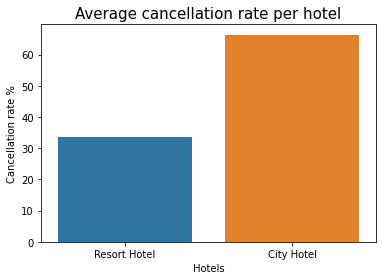

In [238]:
sns.barplot(data=df, x="hotel", y="is_canceled", ci = None, estimator=lambda x: len(x) / len(y) * 100)
plt.xlabel ("Hotels")
plt.ylabel ("Cancellation rate %")
plt.title("Average cancellation rate per hotel", fontsize=15)
plt.show()

# Plotting Lead months correlation

In [46]:
bins=[i for i in range(0,768, 30)]

labels=[f'{i} months' for i in range(1,26)]
#[i for i in range(0,738, 7)]


In [47]:
df['lead_months'] =pd.cut(df.lead_time, bins=bins, labels=labels)

In [48]:
mon = df.groupby(['lead_months', 'is_canceled']).is_canceled.count().unstack()

In [49]:
mon

is_canceled,0,1
lead_months,,
1 months,25606,6256
2 months,10796,6003
3 months,7616,4873
4 months,5789,4515
5 months,4569,3475
6 months,4260,3579
7 months,3097,2528
8 months,2276,2017
9 months,1549,1851


In [50]:
mon['cancel_rate']=mon[1]/(mon[0]+mon[1])

## Correlation between lead months and cancellations

<AxesSubplot:xlabel='lead_months'>

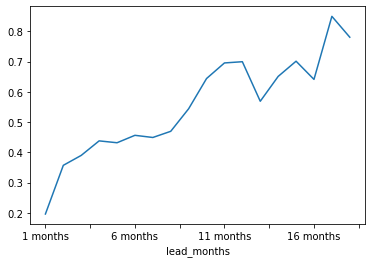

In [51]:
plt
mon['cancel_rate'][:18].plot()

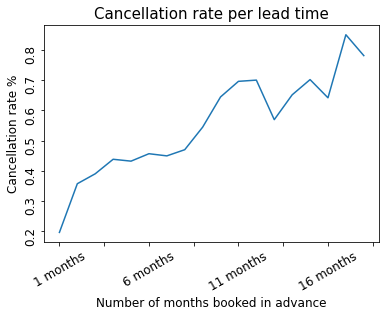

In [250]:
mon['cancel_rate'][:18].plot()
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12, rotation=90)
plt.xlabel ("Number of months booked in advance", fontsize=12)
plt.ylabel ("Cancellation rate %", fontsize=12)
plt.title("Cancellation rate per lead time", fontsize=15)
figsize=(20,18)
#mon['cancel_rate'][:18].plot()
plt.show()

In [53]:
df.groupby(['hotel', 'arrival_date_month']).adr.sum().unstack()

arrival_date_month,April,August,December,February,January,July,June,March,May,November,October,September
hotel,,,,,,,,,,,,
City Hotel,824642.48,1022075.08,363012.39,408283.37,304172.28,887412.15,932503.48,589568.07,988972.89,378651.26,754624.33,806903.86
Resort Hotel,279985.01,909780.55,180541.41,169028.74,107553.60,706429.51,334132.36,190200.00,277988.99,116768.31,219522.15,288536.53


In [54]:
pd.pivot_table(df,index=["hotel"], columns="arrival_date_month",values=["adr"])


adr                                                                                                                              
arrival_date_month       April      August   December   February    January        July        June      March         May   November    October   September
hotel                                                                                                                                                       
City Hotel          111.182753  114.659533  88.821236  85.504371  82.655511  110.746556  119.093676  92.553857  121.629921  88.078916  99.897317  109.872530
Resort Hotel         77.881783  186.774902  69.146461  55.166038  49.472677  155.191017  110.456979  57.601454   78.795065  48.311258  62.134772   93.166461

In [55]:
df.arrival_date_month

0           July
1           July
2           July
3           July
4           July
           ...  
119385    August
119386    August
119387    August
119388    August
119389    August
Name: arrival_date_month, Length: 118183, dtype: object

In [56]:
pd.pivot_table(df,index=["hotel"],columns="arrival_date_month",values=["adr"])


adr                                                                                                                              
arrival_date_month       April      August   December   February    January        July        June      March         May   November    October   September
hotel                                                                                                                                                       
City Hotel          111.182753  114.659533  88.821236  85.504371  82.655511  110.746556  119.093676  92.553857  121.629921  88.078916  99.897317  109.872530
Resort Hotel         77.881783  186.774902  69.146461  55.166038  49.472677  155.191017  110.456979  57.601454   78.795065  48.311258  62.134772   93.166461

In [ ]:
#pd.pivot_table(df,index=["hotel","arrival_date_month"])
pd.pivot_table(df,index=["hotel","arrival_date_month"],values=["adr"])


In [ ]:
#dxp.bar(x='hotel', y='is_canceled', data=df, aggfunc='percna')


In [ ]:
#ax = df.plot(xticks=df.adr)
#ylab = ax.set_ylabel('hotel')

In [58]:
canceled_bookings = df.loc[df.is_canceled == 1]


In [59]:
canceled_bookings.hotel.value_counts()

City Hotel      32186
Resort Hotel    10831
Name: hotel, dtype: int64

In [60]:
not_canceled_bookings = df.loc[df.is_canceled == 0]


In [61]:
not_canceled_bookings.hotel.value_counts()

City Hotel      46228
Resort Hotel    28938
Name: hotel, dtype: int64

# Busiest month for the hotels

In [62]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

sorted_months = not_canceled_bookings['arrival_date_month'].value_counts().reindex(new_order)


In [63]:
city_hotel = not_canceled_bookings.loc[df.hotel=='City Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)


In [64]:
city_hotel

January      2254
February     3064
March        4072
April        4015
May          4579
June         4366
July         4782
August       5381
September    4290
October      4337
November     2696
December     2392
Name: arrival_date_month, dtype: int64

In [256]:
x1 = city_hotel.index
y1 = city_hotel/city_hotel.sum()*100

In [257]:
resort_hotel = not_canceled_bookings.loc[df.hotel=='Resort Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)


In [258]:
resort_hotel

January      1868
February     2308
March        2573
April        2550
May          2535
June         2038
July         3137
August       3257
September    2102
October      2577
November     1976
December     2017
Name: arrival_date_month, dtype: int64

In [259]:
x2 = resort_hotel.index
y2 = resort_hotel/resort_hotel.sum()*100

/Users/hanifk/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/hanifk/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


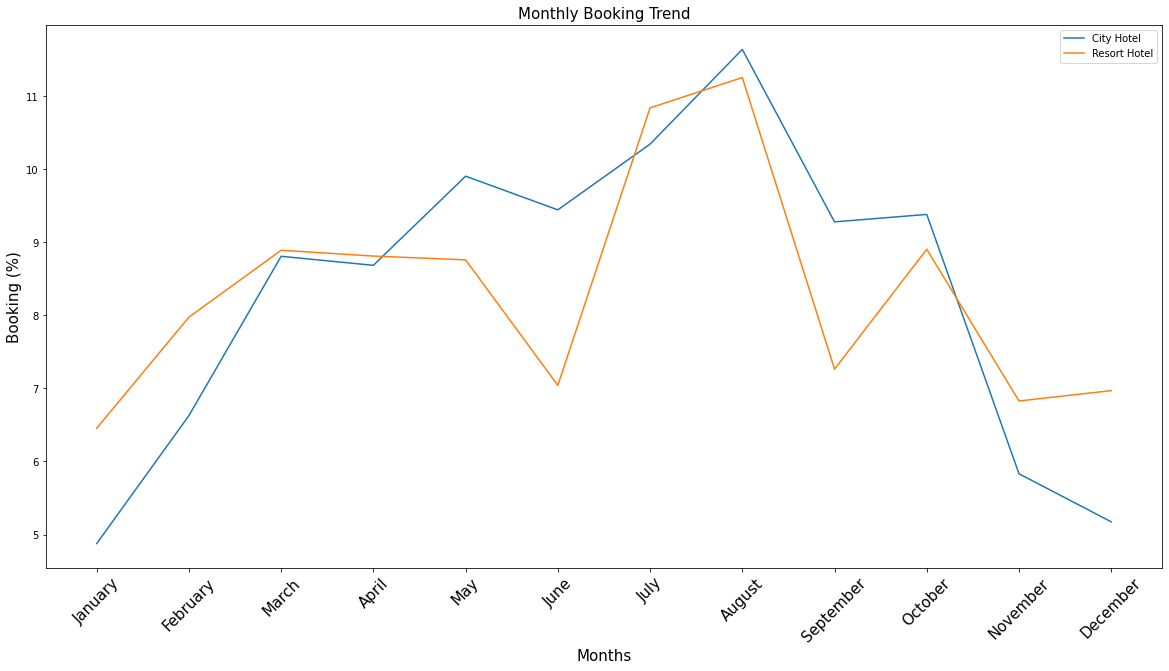

In [267]:
fig, ax = plt.subplots(figsize=(20,10))

ax.set_xlabel('Months', fontsize=15)
ax.set_ylabel('Booking (%)', fontsize=15)
ax.set_title('Monthly Booking Trend', fontsize=15)

plt.xticks(fontsize=15, rotation=45)

sns.lineplot(x1, y1.values, label='City Hotel', sort=False)
sns.lineplot(x1, y2.values, label='Resort Hotel', sort=False)

plt.show()

## Countrys booked

<AxesSubplot:ylabel='country'>

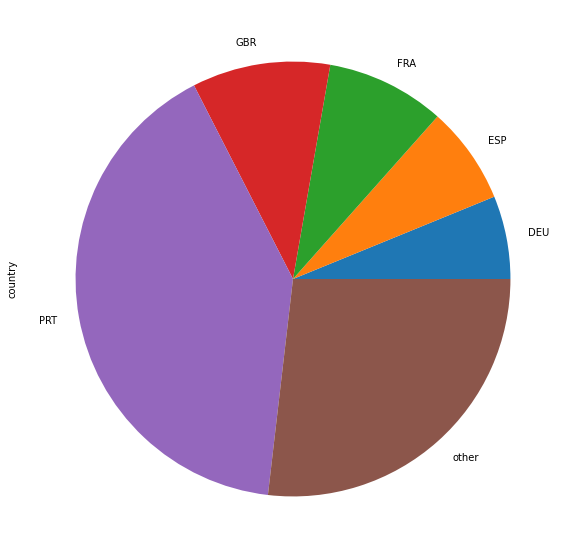

In [71]:
plt.figure(figsize=(20, 10))
s=df['country'].value_counts()
s.groupby(np.where(s>=7274,s.index,'other')).sum().plot.pie()


In [72]:
hotel_cancelations = df.loc[(df.is_canceled == 0) | (df.is_canceled == 1)]


In [77]:
cancelations_per_month

August       5147
July         4646
May          4545
June         4451
April        4447
October      4173
September    4049
March        3027
February     2467
December     2289
November     2044
January      1732
Name: arrival_date_month, dtype: int64

In [79]:
cancel_months = canceled_bookings.arrival_date_month.value_counts(normalize=True)

In [80]:
cancel_months

August       0.119650
July         0.108004
May          0.105656
June         0.103471
April        0.103378
October      0.097008
September    0.094126
March        0.070368
February     0.057349
December     0.053212
November     0.047516
January      0.040263
Name: arrival_date_month, dtype: float64

In [81]:
x1 = cancel_months.index
y1 = cancel_months.values

In [83]:

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']

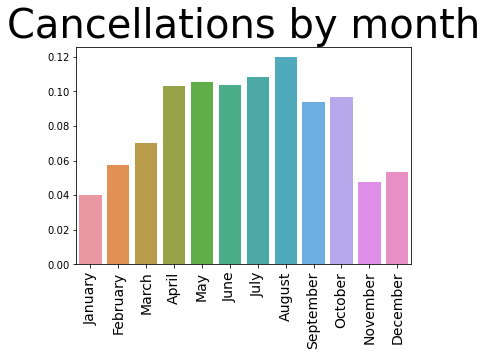

In [223]:
sns.barplot(x=x1, y=y1,  order = months, ci = None)
plt.title("Cancellations by month", fontsize=40)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=10)

figsize=(20,18)

In [85]:
hotel_cancelations.groupby("hotel").is_canceled.value_counts(normalize=True)

hotel         is_canceled
City Hotel    0              0.589538
              1              0.410462
Resort Hotel  0              0.727652
              1              0.272348
Name: is_canceled, dtype: float64

# Average Number of Nights Stayed

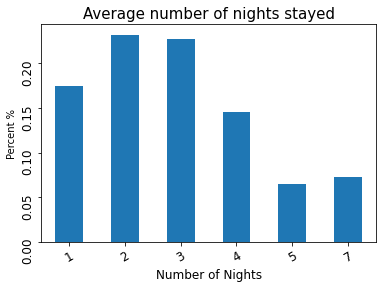

In [377]:
dur = dur[:6].sort_index(ascending=True)
dur[:6].plot(kind="bar") 
estimator=lambda x: len(x) / len(y) * 100
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12, rotation=90)
plt.xlabel ("Number of Nights", fontsize=12)
plt.ylabel ("Percent %", fontsize=10)
plt.title("Average number of nights stayed", fontsize=15)
figsize=(18,16)
plt.show()

In [407]:
df1.adults.value_counts(normalize=True)

2     0.752816
1     0.191068
3     0.052080
0     0.003376
4     0.000525
26    0.000042
5     0.000017
20    0.000017
27    0.000017
6     0.000008
10    0.000008
40    0.000008
50    0.000008
55    0.000008
Name: adults, dtype: float64

## Average Number of People Staying at the hotel

In [408]:
adult_avrg = df1.adults.value_counts(normalize=True)

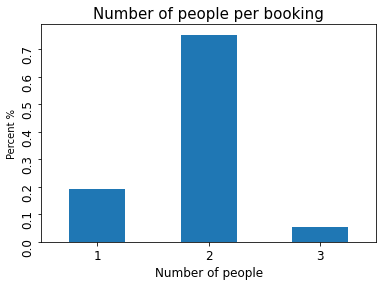

In [414]:
adult_avrg[:3].sort_index(ascending=True).plot(kind="bar")
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=90)
plt.xlabel ("Number of people", fontsize=12)
plt.ylabel ("Percent %", fontsize=10)
plt.title("Number of people per booking", fontsize=15)
figsize=(18,16)
plt.show()

In [93]:
df1 = df.copy()

In [94]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'lead_months'], dtype='object')

In [95]:
df1.drop(["arrival_date_year","meal", "country", "market_segment", 
          "distribution_channel", "arrival_date_day_of_month", "arrival_date_week_number"], axis=1,
        inplace=True)

In [ ]:
canceled_bookings = df.loc[(df.is_canceled == 1)]

In [ ]:
canceled_bookings

In [ ]:
total_nights = canceled_bookings['stays_in_weekend_nights']+ canceled_bookings['stays_in_week_nights']


In [ ]:
= canceled_bookings['stays_in_weekend_nights']+ canceled_bookings['stays_in_week_nights']


In [96]:
df1.reserved_room_type.value_counts(normalize=True)

A    0.720239
D    0.160878
E    0.054703
F    0.024200
G    0.017642
B    0.009333
C    0.007818
H    0.005035
P    0.000102
L    0.000051
Name: reserved_room_type, dtype: float64

## Different Average Prices for top three rooms

In [268]:
canceled_bookings.loc[canceled_bookings.reserved_room_type == "C"]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,lead_months
234,Resort Hotel,1,24,2015,July,28,9,0,3,2,2.0,0,BB,PRT,Online TA,TA/TO,0,0,0,C,C,0,No Deposit,0,Transient,123.00,0,1,1 months
315,Resort Hotel,1,58,2015,July,29,12,2,5,3,1.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,164.57,0,1,2 months
511,Resort Hotel,1,37,2015,July,29,18,2,4,2,2.0,0,HB,PRT,Online TA,TA/TO,0,0,0,C,C,0,No Deposit,0,Transient,168.30,0,0,2 months
853,Resort Hotel,1,3,2015,August,31,1,2,3,2,2.0,0,HB,PRT,Direct,Direct,0,0,0,C,C,1,No Deposit,0,Transient,237.00,0,1,1 months
856,Resort Hotel,1,74,2015,August,31,1,2,5,2,2.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,177.14,0,0,3 months
866,Resort Hotel,1,80,2015,August,31,1,4,6,2,2.0,0,BB,PRT,Online TA,TA/TO,0,0,0,C,C,0,No Deposit,0,Transient,169.00,0,1,3 months
868,Resort Hotel,1,57,2015,August,31,1,4,10,2,2.0,0,BB,PRT,Online TA,TA/TO,0,0,0,C,C,1,No Deposit,0,Transient,135.53,0,0,2 months
887,Resort Hotel,1,13,2015,August,32,3,1,4,2,2.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,C,C,1,No Deposit,0,Contract,220.55,0,0,1 months
950,Resort Hotel,1,73,2015,August,32,7,2,5,2,2.0,0,BB,PRT,Online TA,TA/TO,0,0,0,C,C,0,No Deposit,0,Transient,169.00,0,0,3 months
961,Resort Hotel,1,78,2015,August,32,8,1,1,2,2.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,181.00,0,0,3 months


In [269]:
room_c = df1.loc[df1.reserved_room_type == 'C']


In [270]:
room_c.adr.mean()

160.26395021645024

In [271]:
room_b = df1.loc[df1.reserved_room_type == 'B']


In [272]:
room_b.adr.mean()

90.42524025385336

In [273]:
room_a = df1.loc[df1.reserved_room_type == 'A']


In [274]:
room_a.adr.mean()

90.85229476033268

In [275]:
room_d = df1.loc[df1.reserved_room_type == 'D']


In [276]:
room_d.adr.mean()

120.75088676169078

In [277]:
room_e = df1.loc[df1.reserved_room_type == 'E']


In [278]:
room_e.adr.mean()

124.53861562258304

# Room A, D, E are our rooms with the highest most bookings


# Cancellation rate

In [91]:
df.is_canceled.value_counts(normalize=True)

0    0.636014
1    0.363986
Name: is_canceled, dtype: float64

In [279]:
df1.adr.mean()

101.88680943959545

In [284]:
df1.adr.mean()

101.88680943959545

In [334]:
df1.stays_in_weekend_nights + df1.stays_in_week_nights.mean()


0         2.499141
1         2.499141
2         2.499141
3         2.499141
4         2.499141
            ...   
119385    4.499141
119386    4.499141
119387    4.499141
119388    4.499141
119389    4.499141
Name: stays_in_weekend_nights, Length: 118183, dtype: float64

In [418]:
df1.adults.mean()

1.858380646962761

In [344]:
101 * 3.4 * 1.9

652.4599999999999

In [ ]:
# Average Booking is worth 652 Euros

In [102]:
profit_per_booking = 652 * 0.3 
#Assuming 30%

In [103]:
profit_per_booking

195.6

In [286]:
# profit after discount
101 * 3.4 * 1.9 * 0.9 * 0.3

176.16419999999997

In [146]:
cat_cols = df1.select_dtypes("object").columns



In [130]:
cat_cols

Index(['hotel', 'arrival_date_month', 'reserved_room_type', 'deposit_type', 'customer_type'], dtype='object')

In [127]:
target_var = "is_canceled"

X = df1.drop(columns = target_var)
y = df[target_var]

In [129]:
y.value_counts()

0    75166
1    43017
Name: is_canceled, dtype: int64

# Preprocessing

In [147]:
from sklearn.impute import SimpleImputer
#Simple imputer is for imputing missing values (NaNs)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#One Hot Encoder creates dummies (compare to pd.get_dummies())
from sklearn.preprocessing import OneHotEncoder

In [148]:
categorical_transformation = make_pipeline(SimpleImputer(strategy="constant", fill_value="missing"),
                                          OneHotEncoder(handle_unknown = "ignore"))

In [149]:
num_transformation = make_pipeline(SimpleImputer(strategy="median"),
                                  StandardScaler())

In [150]:
num_cols = X.select_dtypes("number").columns
cat_cols = X.select_dtypes("object").columns

In [151]:
from sklearn.compose import make_column_transformer

In [152]:
preprocessor = make_column_transformer((num_transformation, num_cols), (categorical_transformation, cat_cols))

In [153]:
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previo...
       'customer_type_Group', 'customer_type_Transient', 'customer_type_Transient-Party'],
      dtype='object')),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
              

## Model Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

classifiers = [RandomForestClassifier(), 
               SVC(), 
               LogisticRegression()]

from sklearn.model_selection import GridSearchCV

# Comparing Models

In [156]:
for classifier in classifiers:
    
    pipe = make_pipeline(preprocessor, classifier)
    grid = GridSearchCV(pipe, cv=5, scoring="precision", param_grid = {})
    grid.fit(X_train, y_train)
    
    print(classifier)
    print(grid.best_score_)

RandomForestClassifier()
0.8895469107634325
SVC()
0.8615037201334041


/Users/hanifk/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hanifk/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hanifk/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/hanifk/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/hanifk/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/hanifk/opt/anaconda3/lib/python3.8/s

/Users/hanifk/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hanifk/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hanifk/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/hanifk/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/hanifk/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/hanifk/opt/anaconda3/lib/python3.8/s

AttributeError: 'str' object has no attribute 'decode'

# Using GridSearch

In [157]:
pipe = make_pipeline(preprocessor, RandomForestClassifier())

In [158]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children'...
       'customer_type_Group', 'customer_type_Transient', 'customer_type_Transient-Party'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                     

In [287]:
param_grid_rf = {"randomforestclassifier__min_samples_leaf": [2],
                     "randomforestclassifier__max_depth": [10],
                    "randomforestclassifier__n_estimators": [100]}
grid = GridSearchCV(pipe, param_grid=param_grid_rf, scoring="recall", cv=5)


In [288]:
RandomForestClassifier()

RandomForestClassifier()

In [ ]:
# DataSet was somewhat laarget for multiple parameters so to simplify it - I chose one parameter whilst keeping the function.

In [290]:
grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                 

In [291]:
grid.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children'...
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                 

In [292]:
grid.best_score_

0.47134913216938595

In [294]:
best_model = grid.best_estimator_

## Fitting It on Test Data

In [295]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [296]:
grid.predict(X_test)

array([1, 0, 0, ..., 0, 1, 1])

In [299]:
y_test_pred = grid.predict(X_test)

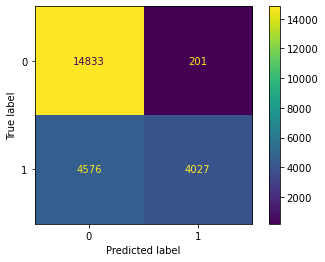

In [300]:
plot_confusion_matrix(best_model, X_test, y_test)

In [219]:
def evaluator(y_true, y_pred):
    conf_mat = confusion_matrix(y_test, y_test_pred)
    tp = conf_mat[1, 1] * 195
    fp = conf_mat[0, 1] * -63
    tn = conf_mat[0, 0] * 0
    fn = conf_mat[1, 0] * 0
    return tp + fp + tn + fn

## Calculating our Profits from the confusion matrix

In [301]:
#Profits
evaluator(y_test, y_test_pred)

772602

In [308]:
FP = 201 * 19
FP

3819

In [309]:
FN = 4576 * 195
FN

892320

In [310]:
TP = (4027*0.2*19) + (4027*0.8*195)
TP

643514.6000000001

In [317]:
model_unrealised_profit = TP + FN + FP
model_unrealised_profit

1539653.6

In [315]:
#Bottom two
base_unrealised_profit = 8603 * 195 
base_unrealised_profit

1677585

In [318]:
base_unrealised_profit - model_unrealised_profit

137931.3999999999

# Base unrealised profit would be, given all assumptions, 8%. 